# (Ford GoBike System Data)
## by (Hossam AlDeen ElShahat)

## Preliminary Wrangling

> Data set that includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

In [177]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [178]:
df = pd.read_csv(r"F:\[CODING - DATA]\[COURSES ( PY )]\[COURSES]\[FWD]-Udacity Data Analyst  [COURSE]\Advanced Track\Communicate data Project\Project Template\201902-fordgobike-tripdata.csv")
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [179]:
df.shape

(183412, 16)

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

### Cleaning The data:

In [181]:
# Check for missing values:
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [182]:
# Removing rows with missing values:
df.dropna(axis= 0, inplace=True)
# Checking again:
df.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [183]:
# Transforming start time column into a date time object and extracting hours / days / months / years from it:

# Converting to day time object:
df["start_time"] = pd.to_datetime(df["start_time"])

# Getting hours:
df['start_hour']= df['start_time'].dt.hour

# Getting days:
df["Start_day"] = df['start_time'].dt.strftime('%a')

# Getting years:
df['start_year']  = df.start_time.dt.year

# Getting Months:
df['start_month'] = df.start_time.dt.month_name()
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_hour,Start_day,start_year,start_month
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,17,Thu,2019,February
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,12,Thu,2019,February
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,17,Thu,2019,February
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,23,Thu,2019,February
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,23,Thu,2019,February


In [184]:
# Getting duration hours from duration sec variable :
df["duration_hrs"] = df['duration_sec']/120
df.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_hour,Start_day,start_year,start_month,duration_hrs
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,4902,Customer,1984.0,Male,No,17,Thu,2019,February,434.875
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,5905,Customer,1972.0,Male,No,12,Thu,2019,February,515.450


In [185]:
# Removing the Other gender as it's inconvenient
df.drop(df.index[df['member_gender'] == 'Other'], inplace = True)
df["member_gender"].value_counts()

Male      130500
Female     40805
Name: member_gender, dtype: int64

In [186]:
# Calculating the age of members:
# Converting the 'member_birth_year' column into numpy int64 to perform a substraction on it's values:
df["member_birth_year"] = df["member_birth_year"].astype(np.int64)

# Calculating the age:
df["member_age"] = 2019 - df["member_birth_year"]

In [187]:
# Taking alook at the new age column:
df["member_age"].describe()

count    171305.000000
mean         34.160649
std          10.116083
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: member_age, dtype: float64

In [188]:
# Max age is 141 which is inconvenient; so will only keep ages below 50: 
df.drop(df.index[df['member_age'] > 50], inplace = True)

In [189]:
# Checking:
df["member_age"].describe()

count    156924.000000
mean         32.006322
std           7.173623
min          18.000000
25%          26.000000
50%          31.000000
75%          36.000000
max          50.000000
Name: member_age, dtype: float64

In [190]:
# Choosing the feature(s) we will be exploring:
df_cleaned = df[[
    "bike_id", "user_type", "member_gender", "member_age", "duration_sec", "duration_hrs", "start_time", "start_hour", "Start_day", 
    "start_month", "start_year"]]
df_cleaned.head()

,bike_id,user_type,member_gender,member_age,duration_sec,duration_hrs,start_time,start_hour,Start_day,start_month,start_year
0,4902,Customer,Male,35,52185,434.875000,2019-02-28 17:32:10.145,17,Thu,February,2019
2,5905,Customer,Male,47,61854,515.450000,2019-02-28 12:13:13.218,12,Thu,February,2019
4,4898,Subscriber,Male,45,1585,13.208333,2019-02-28 23:54:18.549,23,Thu,February,2019
6,3803,Subscriber,Female,36,1147,9.558333,2019-02-28 23:55:35.104,23,Thu,February,2019
7,6329,Subscriber,Male,30,1615,13.458333,2019-02-28 23:41:06.766,23,Thu,February,2019


### What is the structure of your dataset?

> 183412 Rows, 16 Columns

### What is/are the main feature(s) of interest in your dataset?

> who uses the services the most, and what other features has to do in relation with the duration and the type / gender of user

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> bike_id	user_type	member_gender	member_age	duration_sec	duration_hrs	start_time	start_hour	
> Start_day	start_month	start_year


## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

## (Visualization 1)

> About a 90% of the users are subscribed to the service and others are just customers

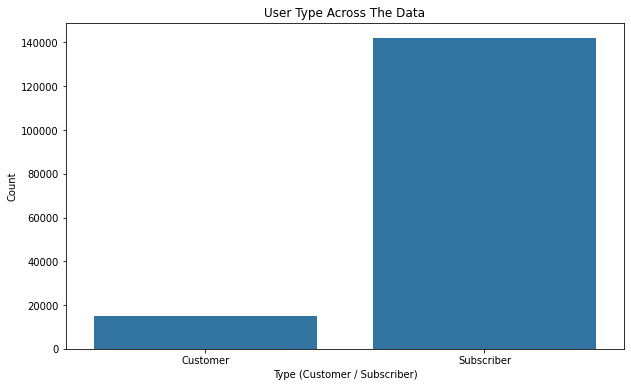

In [191]:
plt.figure(figsize= [10, 6]) 

sb.countplot(data= df_cleaned, x= "user_type", color= base_color);

plt.title("User Type Across The Data")
plt.xlabel("Type (Customer / Subscriber)")
plt.ylabel("Count");

In [192]:
len(df_cleaned.query("user_type == 'Subscriber'")) / len(df_cleaned["user_type"]) * 100

90.47118350284215

> ### About a 90% of the users are subscribed to the service and others are just customers  

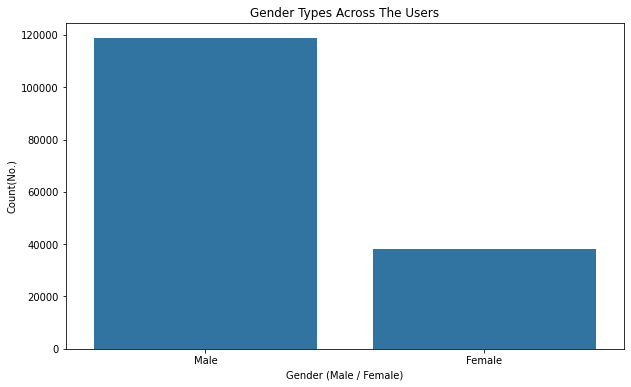

In [193]:
base_color = sb.color_palette()[0]

plt.figure(figsize= [10, 6]) 

sb.countplot(data= df_cleaned, x= "member_gender", color= base_color);

plt.title("Gender Types Across The Users")
plt.xlabel("Gender (Male / Female)")
plt.ylabel("Count(No.)");

In [194]:
len(df_cleaned.query("member_gender == 'Male'")) / len(df_cleaned["user_type"]) * 100

75.66783920878896

> ### Most of users tend to be Males be 76%

## (Visualization 2)

> ## Most of the bikes usage are in the work days ~(83%), with high usage on Thursday; assuming it's used to commute to work  


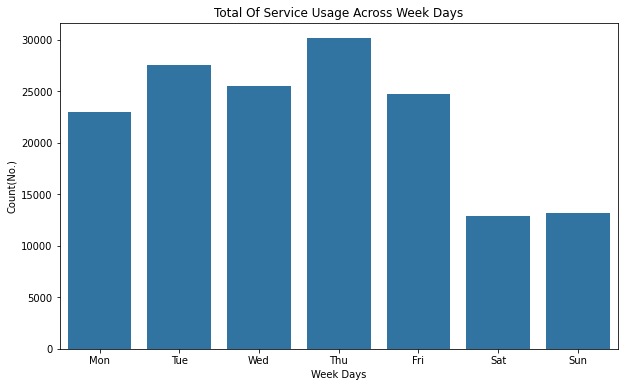

In [195]:
base_color = sb.color_palette()[0]

weekdays_order = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]

# order = df_cleaned["Start_day"].value_counts().index

plt.figure(figsize = [10, 6]) 

sb.countplot(data= df_cleaned, x= "Start_day", color= base_color, order= weekdays_order );

plt.title("Total Of Service Usage Across Week Days")
plt.xlabel("Week Days")
plt.ylabel("Count(No.)");

In [196]:
work_days = ["Mon", "Tue", "Wed", "Thu", "Fri"]
len(df_cleaned.query(f"Start_day in {work_days}")) / len(df_cleaned["Start_day"]) * 100

83.41936223904565

> ### Most of the bikes usage are in the work days ~(83%), with high usage on Thursday; assuming it's used to commute to work  

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

In [197]:
df["duration_hrs"].describe()

count    156924.000000
mean          5.789681
std          13.297191
min           0.508333
25%           2.683333
50%           4.233333
75%           6.525000
max         704.566667
Name: duration_hrs, dtype: float64

Text(0, 0.5, 'Total Trips')

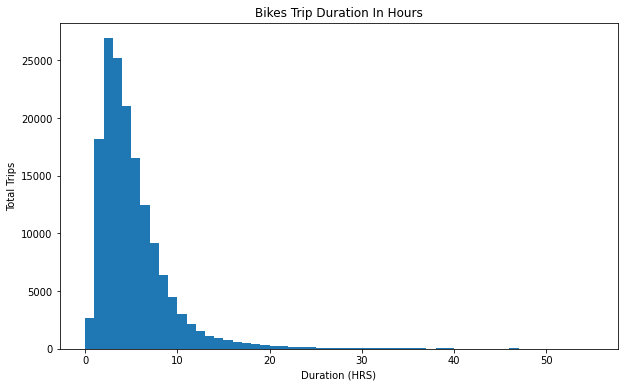

In [198]:
plt.figure(figsize=[10, 6])

bins = np.arange(0, df_cleaned["duration_hrs"].mean()+50, 1)

plt.hist(data= df_cleaned, x= "duration_hrs", bins= bins);

plt.title("Bikes Trip Duration In Hours")
plt.xlabel("Duration (HRS)")
plt.ylabel("Total Trips")

> ### Most of the trips duration are 5 to 10 hours long.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

>### Around 90% of users are subscribers

>### Around of 75% of users are males

>### Around 83% of trips are done on the weekdays and in the weekends

>### Thursday has the most trips done.

>### Trip hourly duration distribution is skewed to the right with most

>### of the trips are within the range of 5 to 10 hours long

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> ### Changed the start time variable to a date time object to extract dates from it using dt() method and create the start day / hour / month / year, also remove the gender type others to limit the investigation to Females/Males only and used member_birth_year to calculate the members age 

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

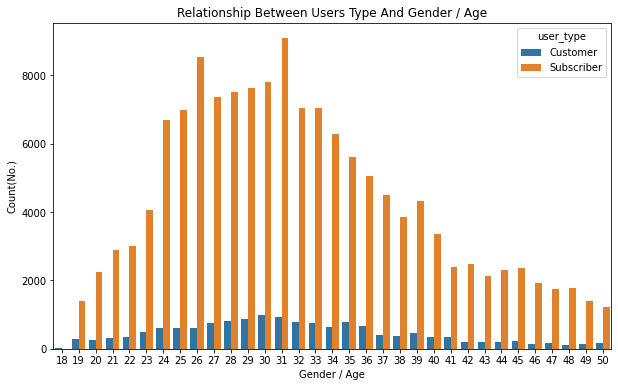

In [199]:
plt.figure(figsize= [10, 6])

sb.countplot(data= df_cleaned, x= "member_age", hue= "user_type");

plt.title("Relationship Between Users Type And Gender / Age")
plt.xlabel("Gender / Age")
plt.ylabel("Count(No.)");

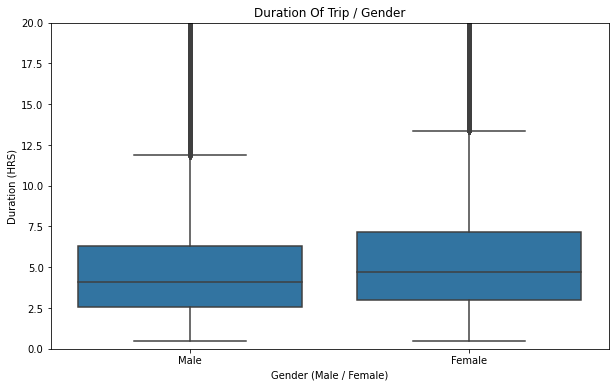

In [200]:
base_color = sb.color_palette()[0]

plt.figure(figsize= [10, 6])

sb.boxplot(data= df_cleaned, x= "member_gender", y= "duration_hrs", color= base_color)
plt.ylim(0, 20)

plt.title("Duration Of Trip / Gender");
plt.xlabel("Gender (Male / Female)")
plt.ylabel("Duration (HRS)");

> ### Females users seem to have a slightly longer trips

## (Visualization 3)

> ## Customers seems to have longer trips

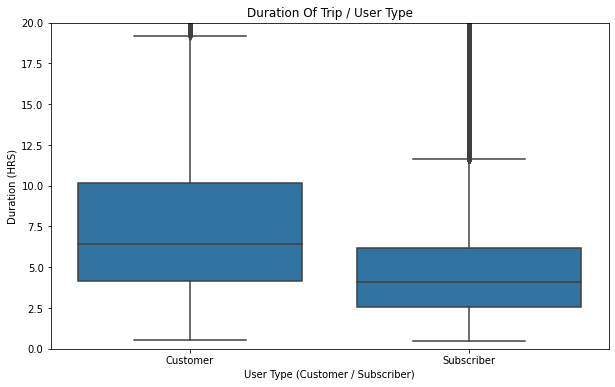

In [201]:
base_color = sb.color_palette()[0]

plt.figure(figsize= [10, 6])

sb.boxplot(data= df_cleaned, x= "user_type", y= "duration_hrs", color= base_color)
plt.ylim(0, 20)

plt.title("Duration Of Trip / User Type");
plt.xlabel("User Type (Customer / Subscriber)")
plt.ylabel("Duration (HRS)");

> ### Customers seems to have longer trips

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
 
> ### Trip count and duration decreases as the member age goes update

> ### Most of customers and subscribers that are taking the trips are within the ages of 27 to 37.

>### Females trips duration are slightly longer that males

>### Customers over all take longer trips than subscribers.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> most of users are males but females take the longer trips but also
> customers take longer trips over all than subscribers so i'm asumming
> most of most of customers are females.


## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

## (Visualization 4)

> ## Customers seem to take more trips on weekends than subscribers, subscribers seems to have asteady trip dutaion across the week with a little dip in the duration on weekends

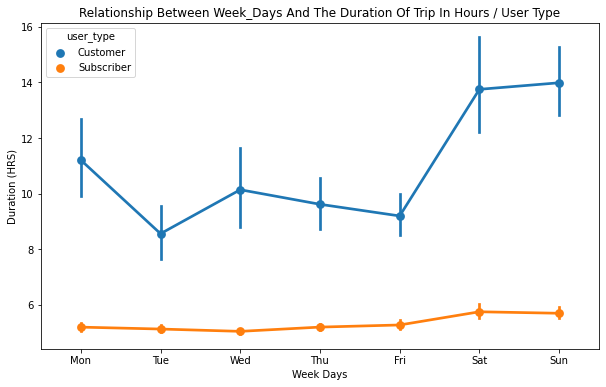

In [202]:
plt.figure(figsize= [10, 6])

weekdays_order = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]

sb.pointplot(data= df_cleaned, x= "Start_day", y= "duration_hrs", hue= "user_type", order= weekdays_order)

plt.title("Relationship Between Week_Days And The Duration Of Trip In Hours / User Type")
plt.xlabel("Week Days")
plt.ylabel("Duration (HRS)");

>### Customers seem to take more trips on weekends than subscribers, subscribers seems to have asteady trip dutaion across the week with a little dip in the duration on weekends

In [205]:
df_cleaned['Start_day'] = pd.Categorical(df_cleaned["Start_day"], 
    categories= ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"], ordered= True)

## (Visualization 5)

> ## Most trips done by females userss are on tuesdays and wednesdays and also fridays around 9 to 7 am and 6 to 8 pm Same thing seems to be true for males uses

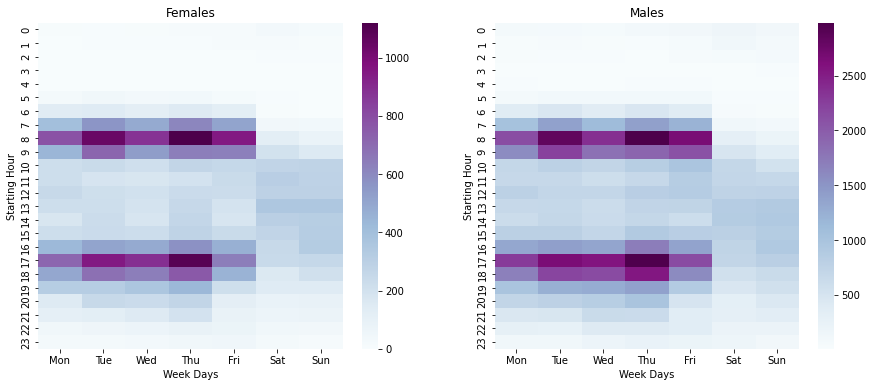

In [206]:
# saving females and males users in variables:
females = df_cleaned.query('member_gender == "Female"')
males = df_cleaned.query('member_gender == "Male"')

# weekdays_order = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]

# Ordering week days categorically: 
# df_cleaned['Start_day'] = pd.Categorical(df_cleaned["Start_day"], 
#     categories= ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"], ordered= True)
    
plt.figure(figsize= (15, 6));

# Plotting the first heatmap (males):
plt.subplot(1, 2, 2);
males = males.groupby(["start_hour", "Start_day"])["bike_id"].size().reset_index()
males = males.pivot("start_hour", "Start_day", "bike_id")
sb.heatmap(males, cmap= "BuPu");

plt.title("Males"), plt.xlabel("Week Days"), plt.ylabel("Starting Hour");

# Plotting the first heatmap (females):
plt.subplot(1, 2, 1) 
females = females.groupby(["start_hour", "Start_day"])["bike_id"].size().reset_index()
females = females.pivot("start_hour", "Start_day", "bike_id")
sb.heatmap(females, cmap= "BuPu");

plt.title("Females"), plt.xlabel("Week Days"), plt.ylabel("Starting Hour");

> ### Most trips done by females userss are on tuesdays and wednesdays and also fridays around 9 to 7 am and 6 to 8 pm Same thing seems to be true for males uses

 ### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Workdays and trips duration , also trip time users seems to make trips around 7 to 9 am and also around 6 to 8 pm, which strengthes the assumption that users are using the service to commute to and from work

### Were there any interesting or surprising interactions between features?

> No, not really

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

In [3]:
!jupyter nbconvert slide_deck_templateFINAL.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook slide_deck_templateFINAL.ipynb to slides
[NbConvertApp] Writing 678631 bytes to slide_deck_templateFINAL.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\CARNIVAL\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\CARNIVAL\anaconda3\lib\site-packages\jupyter_core\application.py", line 270, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\CARNIVAL\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\CARNIVAL\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 350, in start
    self.convert_notebooks()
  File "C:\Users\CARNIVAL\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 524, in convert_notebooks
    self.convert_single_notebook(